In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
from scipy import stats
import matplotlib as mpl

In [2]:
datalrm=pd.read_excel("C:/Users/SHIVLEON/Downloads/lrm.xlsx")

In [3]:
datalrm

,Restaurant,Student_Population,Sales
0,1,2,58
1,2,6,105
2,3,8,88
3,4,8,118
4,5,12,117
5,6,16,137
6,7,20,157
7,8,20,169
8,9,22,149
9,10,26,202


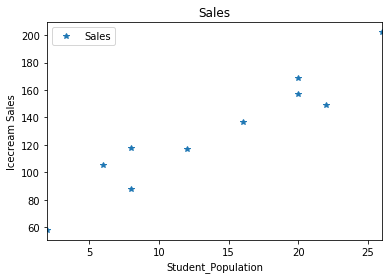

In [4]:
datalrm.plot("Student_Population","Sales",style="*")
plt.ylabel("Icecream Sales")
plt.title("Sales")
plt.show()

In [5]:
#Code for regression equation
import statsmodels.api as s
St_pop=datalrm["Student_Population"]
sales=datalrm["Sales"]
St_pop=s.add_constant(St_pop) #Adds a column of ones to an array

"""The s.OLS method takes two array-like objects a and b as input. 
a is generally a Pandas dataframe or a NumPy array. The shape of a is o*c, 
where o is the number of observations and c is the number of columns. 
b is generally a Pandas series of length o or a one dimensional NumPy array."""

model=s.OLS(sales,St_pop)
"""Model fitting is creating that simplified representation in a way that can generally be used successfully given new data"""

result=model.fit()
result.summary() #prints a summary representation of your model

C:\Users\SHIVLEON\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\SHIVLEON\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     74.25
Date:                Wed, 18 Mar 2020   Prob (F-statistic):           2.55e-05
Time:                        10:14:50   Log-Likelihood:                -39.342
No. Observations:                  10   AIC:                             82.68
Df Residuals:                       8   BIC:                             83.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 60.0000      9.226      6.503      0.000      38.725      81.275
Student_Population     5.0000      0.580      8.617      0.000       3.662       6.338
==============================================================================
Omnibus:                        0.928   Durbin-Watson:                   3.224
Prob(Omnibus):                  0.629   Jarque-Bera (JB):                0.616
Skew:                          -0.060   Prob(JB):                        0.735
Kurtosis:                       1.790   Cond. No.                         33.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
#Quantities of interest can be extracted 
#directly from the fitted model. 
#Type dir(results) for a full list.

In [7]:
dir(result)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cache',
 '_data_attr',
 '_get_robustcov_results',
 '_is_nested',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'initialize',
 'k_constant',
 'llf',
 'load',
 'model',


In [8]:
print("Parameters: ", result.params,"R2: ", result.rsquared)

Parameters:  const                 60.0
Student_Population     5.0
dtype: float64 R2:  0.9027336300063573


In [9]:
# From Summary we get: for y=mx+c, c=60 and x=5

In [10]:
#We can do this a different way too
x=datalrm["Student_Population"].values.reshape(-1,1)
y=datalrm["Sales"].values.reshape(-1,1)

In [11]:
reg=LinearRegression()
reg.fit(x,y)
"""fit training data. For supervised learning applications, 
this accepts two arguments: the data X and the labels y (e.g. model.fit(X, y)). 
For unsupervised learning applications, this accepts only a single argument, the data X (e.g. model.fit(X))."""

'fit training data. For supervised learning applications, \nthis accepts two arguments: the data X and the labels y (e.g. model.fit(X, y)). \nFor unsupervised learning applications, this accepts only a single argument, the data X (e.g. model.fit(X)).'

In [12]:
reg.intercept_[0], reg.coef_[0][0]

(60.0, 5.0)

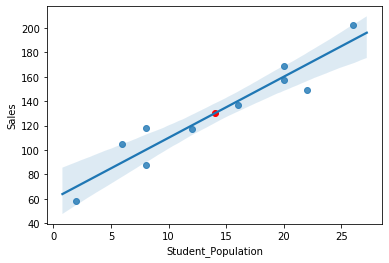

In [13]:
x=datalrm["Student_Population"]
y=datalrm["Sales"]
plt.figure()
sns.regplot(x,y)
plt.scatter(np.mean(x),np.mean(y),color="red")

In [14]:
#For prediction interval
from statsmodels.stats.outliers_influence import summary_table
st,data,ss2=summary_table(result,alpha=0.05) #ss2=columns name, st= tabel
fittedvalues=data[:2]
predict_mean_se=data[:3]
predict_mean_ci_low,predict_mean_ci_upp=data[:,4:6].T
predict_ci_low,predict_ci_upp=data[:,6:8].T

In [15]:
fittedvalues

array([[  1.        ,  58.        ,  70.        ,   8.22258569,
         51.03868339,  88.96131661,  32.89834155, 107.10165845,
        -12.        ,  11.11931133,  -1.07920353,   0.31844743],
       [  2.        , 105.        ,  90.        ,   6.3776403 ,
         75.2931351 , 104.7068649 ,  54.8817226 , 125.1182774 ,
         15.        ,  12.27092923,   1.22240131,   0.20181933]])

In [16]:
predict_mean_se

array([[ 1.00000000e+00,  5.80000000e+01,  7.00000000e+01,
         8.22258569e+00,  5.10386834e+01,  8.89613166e+01,
         3.28983415e+01,  1.07101658e+02, -1.20000000e+01,
         1.11193113e+01, -1.07920353e+00,  3.18447433e-01],
       [ 2.00000000e+00,  1.05000000e+02,  9.00000000e+01,
         6.37764030e+00,  7.52931351e+01,  1.04706865e+02,
         5.48817226e+01,  1.25118277e+02,  1.50000000e+01,
         1.22709292e+01,  1.22240131e+00,  2.01819329e-01],
       [ 3.00000000e+00,  8.80000000e+01,  1.00000000e+02,
         5.58985500e+00,  8.71097713e+01,  1.12890229e+02,
         6.56029139e+01,  1.34397086e+02, -1.20000000e+01,
         1.26492498e+01, -9.48672859e-01,  8.78768540e-02]])

In [17]:
data

array([[ 1.00000000e+00,  5.80000000e+01,  7.00000000e+01,
         8.22258569e+00,  5.10386834e+01,  8.89613166e+01,
         3.28983415e+01,  1.07101658e+02, -1.20000000e+01,
         1.11193113e+01, -1.07920353e+00,  3.18447433e-01],
       [ 2.00000000e+00,  1.05000000e+02,  9.00000000e+01,
         6.37764030e+00,  7.52931351e+01,  1.04706865e+02,
         5.48817226e+01,  1.25118277e+02,  1.50000000e+01,
         1.22709292e+01,  1.22240131e+00,  2.01819329e-01],
       [ 3.00000000e+00,  8.80000000e+01,  1.00000000e+02,
         5.58985500e+00,  8.71097713e+01,  1.12890229e+02,
         6.56029139e+01,  1.34397086e+02, -1.20000000e+01,
         1.26492498e+01, -9.48672859e-01,  8.78768540e-02],
       [ 4.00000000e+00,  1.18000000e+02,  1.00000000e+02,
         5.58985500e+00,  8.71097713e+01,  1.12890229e+02,
         6.56029139e+01,  1.34397086e+02,  1.80000000e+01,
         1.26492498e+01,  1.42300929e+00,  1.97722921e-01],
       [ 5.00000000e+00,  1.17000000e+02,  1.2000000

In [18]:
st

Obs,Dep Var,Predicted,Std Error,Mean ci,Mean ci,Predict ci,Predict ci,Residual,Std Error,Student,Cook's
,Population,Value,Mean Predict,95% low,95% upp,95% low,95% upp,,Residual,Residual,D
1.0,58.0,69.99999999999994,8.222585693865266,51.0386833892804,88.96131661071948,32.89834154784004,107.10165845215985,-11.999999999999943,11.119311332409136,-1.0792035263032782,0.3184474325136633
2.0,105.0,89.99999999999996,6.377640298311584,75.29313510033799,104.70686489966192,54.88172260110567,125.11827739889424,15.000000000000043,12.270929232350422,1.2224013125635869,0.20181932943876033
3.0,88.0,99.99999999999996,5.589854995725687,87.10977126561957,112.89022873438034,65.60291394444249,134.39708605555742,-11.999999999999957,12.649249824663935,-0.9486728593660908,0.08787685396914878
4.0,118.0,99.99999999999996,5.589854995725687,87.10977126561957,112.89022873438034,65.60291394444249,134.39708605555742,18.000000000000043,12.649249824663935,1.4230092890491446,0.1977229214305871
5.0,117.0,119.99999999999997,4.524580752502433,109.56629807543696,130.433701924563,86.44610800310326,153.55389199689668,-2.9999999999999716,13.068212158290226,-0.2295646844160567,0.0031586717422392115
6.0,137.0,139.99999999999997,4.524580752502434,129.56629807543695,150.433701924563,106.44610800310325,173.5538919968967,-2.9999999999999716,13.068212158290226,-0.2295646844160567,0.0031586717422392124
7.0,157.0,160.0,5.589854995725688,147.10977126561963,172.89022873438037,125.60291394444255,194.39708605555745,-3.0,12.649249824663935,-0.23716821484152356,0.005492303373071841
8.0,169.0,160.0,5.589854995725688,147.10977126561963,172.89022873438037,125.60291394444255,194.39708605555745,9.0,12.649249824663935,0.7115046445245706,0.049430730357646564
9.0,149.0,170.0,6.377640298311584,155.29313510033802,184.70686489966198,134.8817226011057,205.1182773988943,-21.0,12.270929232350422,-1.7113618375890167,0.39556588569996803


In [19]:
ss2

['Obs',
 'Dep Var\nPopulation',
 'Predicted\nValue',
 'Std Error\nMean Predict',
 'Mean ci\n95% low',
 'Mean ci\n95% upp',
 'Predict ci\n95% low',
 'Predict ci\n95% upp',
 'Residual',
 'Std Error\nResidual',
 'Student\nResidual',
 "Cook's\nD"]

C:\Users\SHIVLEON\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


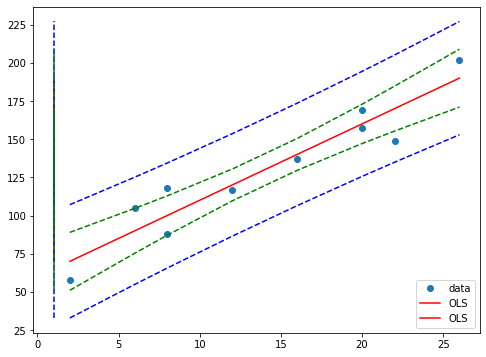

In [20]:
X=s.add_constant(x)
fig,ax=plt.subplots(figsize=(8,6))
ax.plot(x,y,'o',label="data")
ax.plot(X,result.fittedvalues,"r-",label="OLS")
ax.plot(X,predict_ci_low,"b--")
ax.plot(X,predict_ci_upp,"b--")
ax.plot(X,predict_mean_ci_low,"g--")
ax.plot(X,predict_mean_ci_upp,"g--")
ax.legend(loc="best")
plt.show()